In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
tf.test.is_built_with_cuda()

False

In [4]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [8]:
X_train[0].shape

(32, 32, 3)

In [10]:
y_train[0].shape

(1,)

In [15]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [16]:
y_train[0].shape

()

In [17]:
y_test = y_test.reshape(-1,)

In [18]:
classes=['airplane','automoblie','bird','cat','deer','dog','frog','horse','ship','truck']

In [19]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

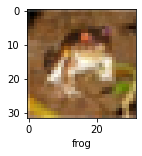

In [20]:
plot_sample(X_train,y_train,0)

In [21]:
X_test=X_test/255.0
X_train=X_train/255.0

In [22]:
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [23]:
y_train


array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [24]:
ann =models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(3000,activation='relu'),
    layers.Dense(10,activation='softmax')
])

ann.compile(optimizer='SGD',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 111s 71ms/step - loss: 1.8059 - accuracy: 0.3593
Epoch 2/5
1563/1563 [==============================] - 107s 68ms/step - loss: 1.6183 - accuracy: 0.4312
Epoch 3/5
1563/1563 [==============================] - 106s 68ms/step - loss: 1.5372 - accuracy: 0.4586
Epoch 4/5
1563/1563 [==============================] - 114s 73ms/step - loss: 1.4778 - accuracy: 0.4803
Epoch 5/5
1563/1563 [==============================] - 113s 73ms/step - loss: 1.4270 - accuracy: 0.4984


In [25]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 3s 11ms/step - loss: 1.4523 - accuracy: 0.4899 0s - loss: 1.4524 - accuracy: 0.


[1.4522972106933594, 0.48989999294281006]

In [84]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.57      0.56      0.56      1000
           1       0.67      0.55      0.60      1000
           2       0.47      0.18      0.26      1000
           3       0.37      0.31      0.34      1000
           4       0.34      0.59      0.43      1000
           5       0.36      0.45      0.40      1000
           6       0.56      0.48      0.51      1000
           7       0.54      0.56      0.55      1000
           8       0.57      0.67      0.62      1000
           9       0.59      0.56      0.58      1000

    accuracy                           0.49     10000
   macro avg       0.51      0.49      0.49     10000
weighted avg       0.51      0.49      0.49     10000



In [85]:
y_pred

array([[0.02123286, 0.04837492, 0.08505241, ..., 0.00487475, 0.04008494,
        0.00506883],
       [0.0980008 , 0.08678362, 0.00474854, ..., 0.00250368, 0.4880355 ,
        0.30977756],
       [0.4270185 , 0.03735249, 0.00908023, ..., 0.00790987, 0.44285575,
        0.06123884],
       ...,
       [0.00167774, 0.00196775, 0.13315393, ..., 0.02466491, 0.00937529,
        0.00353274],
       [0.0319697 , 0.02642043, 0.18154341, ..., 0.02770456, 0.00614425,
        0.00949244],
       [0.04834931, 0.01093023, 0.09390879, ..., 0.3073981 , 0.01692952,
        0.02609167]], dtype=float32)

In [86]:
y_pred_classes 

[3,
 8,
 8,
 8,
 4,
 6,
 3,
 4,
 4,
 1,
 8,
 9,
 1,
 7,
 9,
 8,
 5,
 4,
 8,
 6,
 9,
 2,
 0,
 9,
 4,
 6,
 6,
 4,
 9,
 6,
 6,
 4,
 4,
 5,
 9,
 1,
 4,
 9,
 9,
 5,
 0,
 6,
 3,
 4,
 0,
 9,
 3,
 8,
 4,
 4,
 9,
 8,
 6,
 3,
 8,
 8,
 5,
 9,
 5,
 4,
 4,
 3,
 1,
 9,
 6,
 2,
 8,
 2,
 3,
 9,
 4,
 7,
 8,
 8,
 0,
 4,
 9,
 3,
 3,
 8,
 8,
 1,
 1,
 2,
 2,
 7,
 2,
 0,
 8,
 9,
 0,
 4,
 8,
 6,
 4,
 5,
 4,
 0,
 7,
 7,
 5,
 4,
 6,
 3,
 1,
 1,
 5,
 6,
 8,
 5,
 4,
 2,
 6,
 4,
 9,
 3,
 0,
 7,
 2,
 5,
 8,
 4,
 9,
 4,
 0,
 3,
 8,
 3,
 4,
 0,
 4,
 1,
 9,
 9,
 1,
 3,
 9,
 7,
 6,
 8,
 4,
 0,
 3,
 5,
 8,
 7,
 6,
 5,
 5,
 3,
 8,
 3,
 8,
 8,
 0,
 5,
 2,
 8,
 3,
 0,
 2,
 1,
 5,
 4,
 9,
 7,
 8,
 4,
 7,
 0,
 9,
 7,
 0,
 8,
 7,
 9,
 8,
 5,
 5,
 9,
 8,
 7,
 6,
 8,
 5,
 8,
 6,
 5,
 7,
 0,
 4,
 3,
 5,
 1,
 7,
 4,
 8,
 4,
 7,
 8,
 3,
 8,
 8,
 7,
 1,
 5,
 8,
 4,
 7,
 8,
 5,
 1,
 3,
 7,
 8,
 5,
 8,
 9,
 0,
 4,
 7,
 3,
 8,
 3,
 9,
 9,
 3,
 4,
 3,
 3,
 3,
 9,
 1,
 1,
 8,
 0,
 4,
 0,
 6,
 5,
 1,
 8,
 7,
 0,
 0,
 3,
 7,
 0,
 5,
 1,


In [87]:
np.argmax(y_pred[0])

3

<b>Now let us build a convolutional neural network to train our images</b>

In [89]:
cnn = models.Sequential([
    
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [90]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [91]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.4543 - accuracy: 0.4785
Epoch 2/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.1057 - accuracy: 0.6127
Epoch 3/10
1563/1563 [==============================] - 43s 27ms/step - loss: 0.9668 - accuracy: 0.6646
Epoch 4/10
1563/1563 [==============================] - 43s 28ms/step - loss: 0.8830 - accuracy: 0.6941
Epoch 5/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.8192 - accuracy: 0.7184
Epoch 6/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.7651 - accuracy: 0.7348
Epoch 7/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.7236 - accuracy: 0.7491
Epoch 8/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.6790 - accuracy: 0.7648
Epoch 9/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.6375 - accuracy: 0.7778
Epoch 10/10
1563/1563 [==============================] - 44s 28m

<b>With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features</b>

In [92]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.9352 - accuracy: 0.7029


[0.9352080225944519, 0.7028999924659729]

In [93]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[2.2654716e-05, 1.6833397e-04, 2.4762223e-03, 9.2165554e-01,
        1.4240524e-05, 4.1718106e-03, 3.7016792e-03, 2.5768975e-07,
        6.7780100e-02, 9.3190747e-06],
       [8.3600311e-03, 3.1753549e-01, 4.7635062e-06, 1.6094745e-06,
        1.0183656e-05, 5.3798903e-08, 2.2864406e-06, 4.6528179e-08,
        6.4123505e-01, 3.2850523e-02],
       [6.2879190e-02, 1.2629230e-01, 1.3664218e-03, 1.5535875e-02,
        4.0938780e-03, 2.3129650e-03, 2.4891261e-04, 5.8740382e-03,
        7.4464643e-01, 3.6750022e-02],
       [5.7453728e-01, 5.6248973e-04, 1.8635167e-01, 1.5335303e-03,
        5.0413487e-03, 1.5335778e-05, 1.1108439e-04, 1.0610269e-05,
        2.3179558e-01, 4.0931616e-05],
       [9.6115127e-07, 1.2537270e-06, 6.0187709e-03, 3.4856457e-02,
        6.6106111e-01, 5.5594294e-04, 2.9747412e-01, 3.0452380e-05,
        8.5770660e-07, 9.3554469e-08]], dtype=float32)

In [94]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [95]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

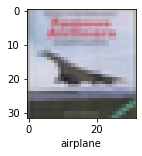

In [96]:

plot_sample(X_test, y_test,3)

In [97]:
classes[y_classes[3]]

'airplane'

In [99]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.69      0.74      1000
           1       0.86      0.74      0.79      1000
           2       0.62      0.57      0.60      1000
           3       0.54      0.54      0.54      1000
           4       0.59      0.74      0.66      1000
           5       0.70      0.53      0.60      1000
           6       0.71      0.82      0.76      1000
           7       0.77      0.72      0.74      1000
           8       0.73      0.87      0.80      1000
           9       0.77      0.81      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000

